In [102]:
from pathlib import Path
import pickle
from om_data.exported import *
from matplotlib import pyplot


In [104]:
dataset_dir = '/home/ynogin/out/DatasetExported/ScanSets.Lambda_NEB_MTaqI_Polylysine.0/'

In [115]:
genome_data: GenomeSeqLabeledExported = pickle.loads(Path(dataset_dir, 'genome.pickle').read_bytes())
print(
    'organism: ', genome_data.organism.name, genome_data.organism.description, '\n'
    'seq: ', genome_data.genome_seq_bytes[:32], '...', '\n'
    'patterns: ', genome_data.genome_seq_labeled.patterns, '\n'
    'num labeled: ', genome_data.labeled_mask.sum(), '\n',
)

organism:  Lambda_NEB https://international.neb.com/products/n3011-lambda-dna 
seq:  b'GGGCGGCGACCTCGCGGGTTTTCGCTATTTAT' ... 
patterns:  ('TCGA',) 
num labeled:  121 



In [116]:
files = list(Path(dataset_dir).glob('segmented_images/*.pickle'))
print(len(files))
print(*files[:1])

75
/home/ynogin/out/DatasetExported/ScanSets.Lambda_NEB_MTaqI_Polylysine.0/segmented_images/20220315T234140Z_0c0119a5-5a2b-45c3-8346-3c044703f3c6.pickle


In [91]:
file = files[0]
segmented_image: SegmentedImageExported = pickle.loads(file.read_bytes())

print(segmented_image.image_metadata.file)
print(len(segmented_image.image_segments))

/home/ynogin/data/images/2021-05-18/timelapse01_00047.nd2
5


In [92]:
image_segment = segmented_image.image_segments[1]
print(image_segment.profile_coords_map.shape)

(2, 11, 67)


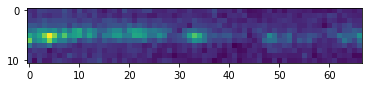

In [100]:
from ipywidgets import interact, IntSlider

profile_image_seq = image_segment.profile_image_seq

def plot_profile(frame):
    pyplot.imshow(profile_image_seq[frame])

plot_profile(0)

In [101]:
interact(frame=IntSlider(min=0, max=len(profile_image_seq)-1))(plot_profile)

interactive(children=(IntSlider(value=0, description='frame', max=19), Output()), _dom_classes=('widget-intera…

<function __main__.plot_profile(frame)>

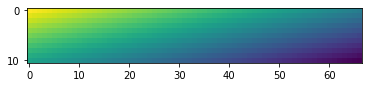

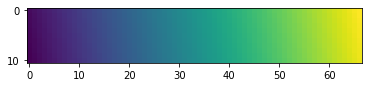

In [94]:
pyplot.figure()
pyplot.imshow(image_segment.profile_coords_map[0])
pyplot.figure()
pyplot.imshow(image_segment.profile_coords_map[1])

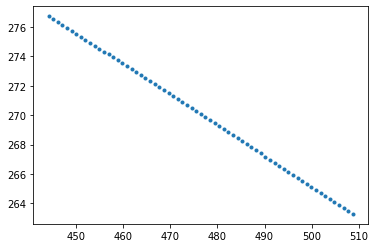

In [95]:
pyplot.plot(*image_segment.profile_curve_coords.T[::-1], '.')